# New Code

In [30]:
import cv2
import dlib
import os
import numpy as np
import pandas as pd
import gc

## Create the .npy file that contains the landmarks in each frame in each video

In [31]:
# Define function to extract lip aspect ratio
def lip_aspect_ratio(lip_points):
    # Lip indices for vertical and horizontal distances
    vertical_1 = np.linalg.norm(np.array(lip_points[2]) - np.array(lip_points[10]))
    vertical_2 = np.linalg.norm(np.array(lip_points[4]) - np.array(lip_points[8]))
    horizontal = np.linalg.norm(np.array(lip_points[0]) - np.array(lip_points[6]))

    return (vertical_1 + vertical_2) / (2.0 * horizontal)

In [32]:
# Function to process frames of a video and extract lip landmarks
def process_video(video_path, predictor, detector):
    cap = cv2.VideoCapture(video_path)
    frame_landmarks = []
    frame_aspect_ratios = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        lip_points = detect_lips(frame, predictor, detector)
        if lip_points:
            frame_landmarks.append(lip_points)
        else:
            frame_landmarks.append(None)

    cap.release()
    gc.collect()
    return frame_landmarks

In [33]:
# Function to detect lips from an image
def detect_lips(image, predictor, detector):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        lip_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(48, 68)]
        return lip_points
    return None

In [34]:
# Main function to process all videos
def process_all_videos(video_folder, predictor, detector):
    video_files = [f for f in os.listdir(video_folder) if f.endswith(('.mp4', '.avi', '.mov'))]
    all_landmarks = {}

    for video in video_files:
        video_path = os.path.join(video_folder, video)
        print(f"Processing {video}...")
        frame_landmarks = process_video(video_path, predictor, detector)
        all_landmarks[video] = frame_landmarks
        gc.collect()

    # Save the landmarks as a NumPy file
    np.save("lip_landmarks.npy", all_landmarks)

In [35]:
# Load pre-trained model
data_path = "./drive/MyDrive"
# Define the video folder
nags_word_videos_folder = "./drive/MyDrive/nags_word_videos"

pretrained_model_path = os.path.join(data_path, "shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)

In [36]:
# Process all videos
process_all_videos(nags_word_videos_folder, predictor, detector)

Processing 0_kukbu.mp4...
Processing 1_kukbu.mp4...
Processing 2_vakit.mp4...
Processing 3_kufkak.mp4...
Processing 4_kakbu.mp4...
Processing 5_kafuka.mp4...
Processing 6_kafka.mp4...
Processing 7_kupku.mp4...
Processing 8_tapu.mp4...
Processing 9_ufuk.mp4...
Processing 10_kuvuk.mp4...
Processing 11_kabuk.mp4...
Processing 12_kukbak.mp4...
Processing 13_kufkak.mp4...
Processing 14_paket.mp4...
Processing 15_afkun.mp4...
Processing 16_bacak.mp4...
Processing 17_kavun.mp4...
Processing 18_kafkuk.mp4...
Processing 19_kupa.mp4...
Processing 20_kukbak.mp4...
Processing 21_afkun.mp4...
Processing 22_kapa.mp4...
Processing 23_ufak.mp4...
Processing 24_kovuk.mp4...
Processing 25_kakpu.mp4...
Processing 26_ufku.mp4...
Processing 27_kukvuk.mp4...
Processing 28_kukfuk.mp4...
Processing 29_kakvak.mp4...
Processing 30_kukbu.mp4...
Processing 31_kukpu.mp4...
Processing 32_kafuka.mp4...
Processing 33_kafkuk.mp4...
Processing 34_takfa.mp4...
Processing 35_kapa.mp4...
Processing 36_kapkuk.mp4...
Proces

## Create new csv files of scores from the npy file of landmarks

### Use Aspect Ratio for example

In [39]:
# Function to calculate aspect ratio from saved .npy file
def calculate_aspect_ratios_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_aspect_ratios = []
        for lip_points in frames:
            if lip_points:
                frame_aspect_ratios.append(lip_aspect_ratio(lip_points))
            else:
                frame_aspect_ratios.append(None)
        all_data[video] = frame_aspect_ratios

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("lip_aspect_ratios_from_npy.csv", index=True)
    return df

In [40]:
# Calculate aspect ratios from .npy file and save as CSV
calculate_aspect_ratios_from_npy("lip_landmarks.npy")


,Frame_0,Frame_1,Frame_2,Frame_3,Frame_4,Frame_5,Frame_6,Frame_7,Frame_8,Frame_9,...,Frame_120,Frame_121,Frame_122,Frame_123,Frame_124,Frame_125,Frame_126,Frame_127,Frame_128,Frame_129
Video Name,,,,,,,,,,,,,,,,,,,,,
0_kukbu.mp4,0.352487,0.348033,0.344942,0.358860,0.380563,0.389194,0.390768,0.414199,0.423342,0.417850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_kukbu.mp4,0.470461,0.467856,0.472564,0.472599,0.468655,0.468085,0.470515,0.477204,0.477043,0.479402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_vakit.mp4,0.423026,0.422830,0.426165,0.422521,0.437735,0.426454,0.439308,0.435872,0.431190,0.429488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_kufkak.mp4,0.486241,0.481367,0.485992,0.479010,0.481331,0.490575,0.485677,0.495156,0.495487,0.490655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_kakbu.mp4,0.396301,0.399165,0.392708,0.403385,0.383792,0.391117,0.405826,0.396462,0.406092,0.414774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90_çubuk.mp4,0.452178,0.454837,0.447639,0.447695,0.444072,0.454102,0.446372,0.454891,0.459652,0.452706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91_kapkak.mp4,0.499728,0.492775,0.478632,0.499867,0.502390,0.497654,0.492874,0.497621,0.497603,0.488130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92_kukvuk.mp4,0.530999,0.533541,0.536212,0.528541,0.528569,0.535941,0.540767,0.531253,0.530939,0.536268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Nags Ratio, a better aspect ratio I thought that would work with nags.

In [41]:
# Define function to extract nags ratio
def nags_ratio(lip_points):
    distance_3_9 = np.linalg.norm(np.array(lip_points[3]) - np.array(lip_points[9]))
    distance_7_11 = np.linalg.norm(np.array(lip_points[7]) - np.array(lip_points[11]))

    return distance_3_9 / distance_7_11 if distance_7_11 != 0 else None

In [54]:
# Define function to extract nags ratio
def nags_ratio2(lip_points):
    distance_3_9 = np.linalg.norm(np.array(lip_points[3]) - np.array(lip_points[9]))
    distance_8_10 = np.linalg.norm(np.array(lip_points[8]) - np.array(lip_points[10]))

    return distance_3_9 / distance_8_10 if distance_8_10 != 0 else None

In [55]:
# Function to calculate nags ratio from saved .npy file
def calculate_nags_ratios_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_aspect_ratios = []
        for lip_points in frames:
            if lip_points:
                frame_aspect_ratios.append(nags_ratio2(lip_points))
            else:
                frame_aspect_ratios.append(None)
        all_data[video] = frame_aspect_ratios

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("nags_ratio2s_from_npy.csv", index=True)
    return df

In [56]:
# Calculate nags ratios from .npy file and save as CSV
df_aspect_ratios_from_npy = calculate_nags_ratios_from_npy("lip_landmarks.npy")
df_aspect_ratios_from_npy

,Frame_0,Frame_1,Frame_2,Frame_3,Frame_4,Frame_5,Frame_6,Frame_7,Frame_8,Frame_9,...,Frame_120,Frame_121,Frame_122,Frame_123,Frame_124,Frame_125,Frame_126,Frame_127,Frame_128,Frame_129
Video Name,,,,,,,,,,,,,,,,,,,,,
0_kukbu.mp4,1.283766,1.283263,1.262125,1.295012,1.349915,1.423729,1.381143,1.483766,1.459668,1.460662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_kukbu.mp4,1.652918,1.595944,1.627448,1.670193,1.602681,1.638792,1.670193,1.670193,1.643555,1.633147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_vakit.mp4,1.419537,1.426311,1.441254,1.418617,1.482604,1.418709,1.474617,1.450948,1.435297,1.457347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_kufkak.mp4,1.666075,1.604702,1.622079,1.606029,1.599459,1.660841,1.688739,1.638464,1.654930,1.555441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_kakbu.mp4,1.338111,1.296618,1.338014,1.376407,1.295829,1.322286,1.364761,1.338402,1.386469,1.426415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90_çubuk.mp4,1.435388,1.467831,1.500370,1.459385,1.491693,1.500093,1.428660,1.491803,1.508197,1.444350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91_kapkak.mp4,1.622079,1.622733,1.539683,1.612065,1.706984,1.666435,1.596567,1.571429,1.612984,1.555360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92_kukvuk.mp4,1.650039,1.665903,1.687618,1.733093,1.704768,1.666759,1.693405,1.704081,1.692745,1.721311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Some Plots

In [57]:
# Function to plot aspect ratio over frames for a given video
def plot_aspect_ratio(df, video_name, score_name="Aspect Ratio"):
    if video_name in df.index:
        plt.figure(figsize=(10, 5))
        plt.plot(df.columns, df.loc[video_name], marker='o', linestyle='-', label=video_name)
        plt.xlabel("Frame Number")
        plt.ylabel(score_name)
        plt.title(f"{score_name} Over Time: {video_name}")
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("Video not found in DataFrame.")

# Function to plot histogram of aspect ratios
def plot_histogram(df, score_name="Aspect Ratio"):
    plt.figure(figsize=(10, 5))
    plt.hist(df.values.flatten(), bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(score_name)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {score_name} Across All Videos")
    plt.grid()
    plt.show()

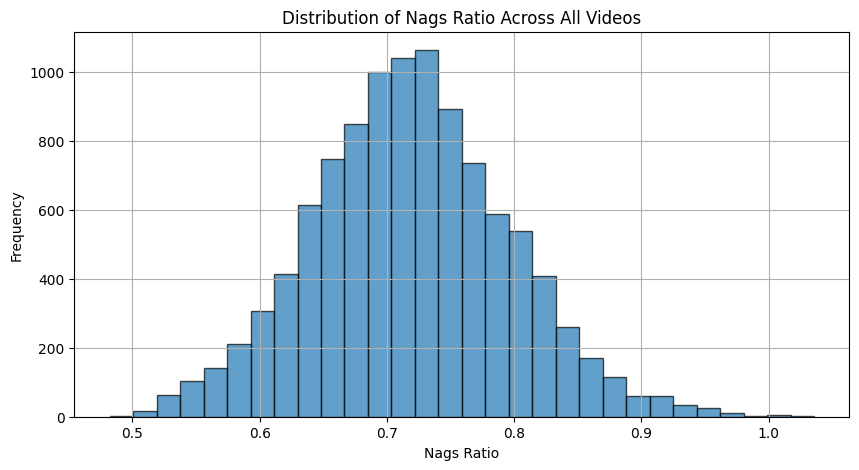

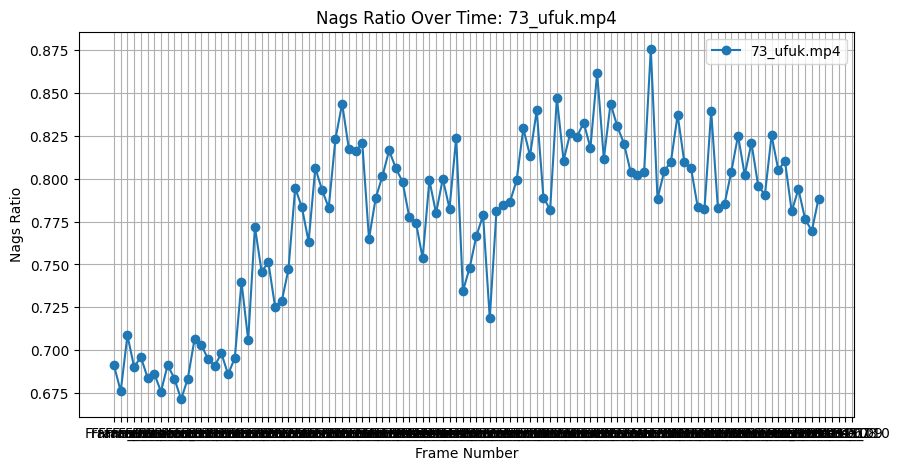

In [65]:
# Read the CSV file
df_from_csv = pd.read_csv("nags_ratios_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "Nags Ratio")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "Nags Ratio")  # 23_ufak 73_ufuk

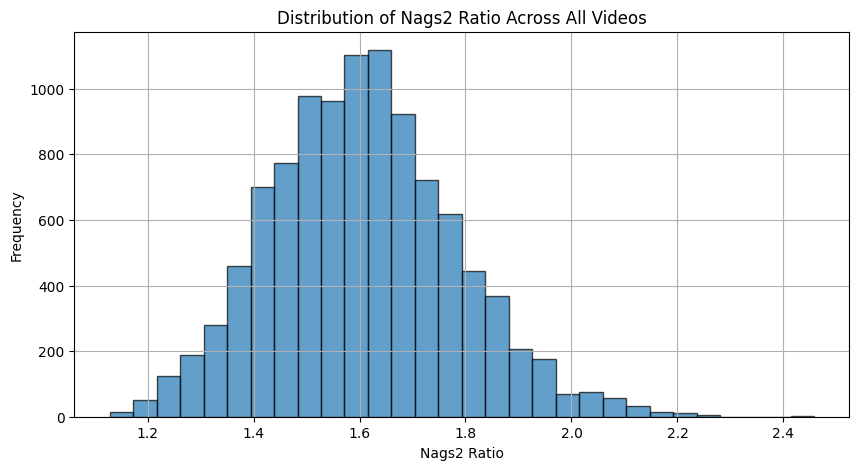

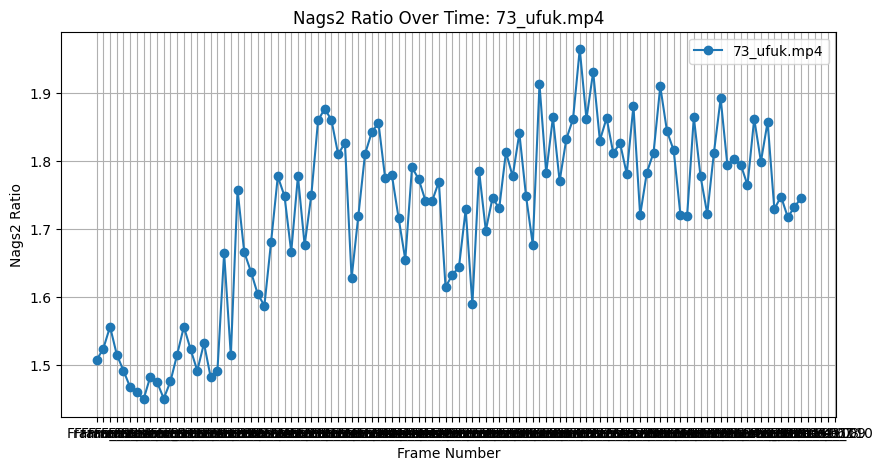

In [66]:
# Read the CSV file
df_from_csv = pd.read_csv("nags_ratio2s_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "Nags2 Ratio")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "Nags2 Ratio")

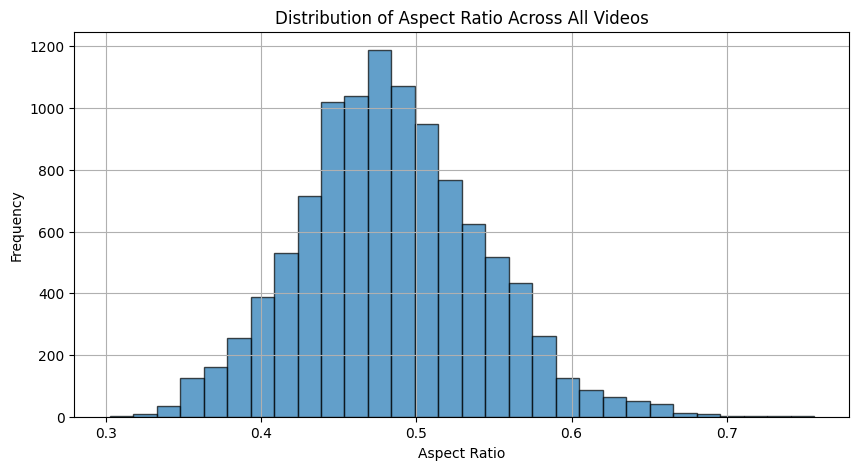

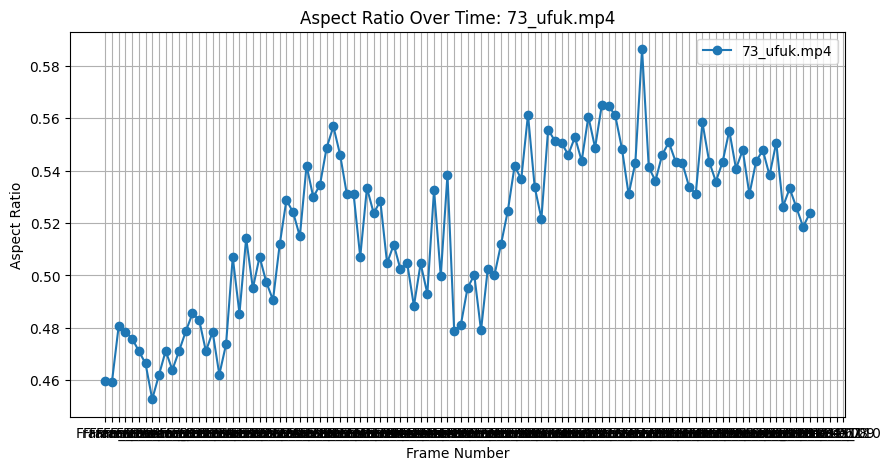

In [67]:
# Read the CSV file
df_from_csv = pd.read_csv("lip_aspect_ratios_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "Aspect Ratio")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "Aspect Ratio")

# Old Code

In [ ]:
import cv2
import dlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Comment above if you do not wish to use google drive to access the video or images.

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = "./drive/MyDrive"  # if the data uploaded to the google drive.

In [ ]:
video_path = os.path.join(DATA_PATH, "kukbu.mp4")  # kukbu nagi_new.MP4 # I suggest using your google drive.
# Uncomment below and comment above if you upload your video to colab directory instead of pulling the video from google drive.
# video_path = "TavukYavas.mp4"

In [ ]:
nags_word_videos_folder = "./drive/MyDrive/nags_word_videos"

In [ ]:
# Get a list of all video files in the folder
video_files = [f for f in os.listdir(nags_word_videos_folder) if f.endswith(('.mp4', '.avi', '.mov'))]

video_files[0][:-4]

'0_kukbu'

In [ ]:
# Creates the frames as .jpg files and put them into the output_folder parameter named folder.
# Be aware! When you use the function, Don't use it with another video blatantly.
# I have not yet developed it for such cases.

def video_to_frames(video_path, output_folder):

    # Check if the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = f"{output_folder}/frame_{count}.jpg"
        cv2.imwrite(frame_path, frame)
        count += 1
    cap.release()

In [ ]:
# Example usage
video_to_frames(video_path, 'frames_output')

In [ ]:
# Example usage
video_to_frames(nags_word_videos_folder +"/" +  video_files[0], 'frames_output_' + video_files[0][:-4])

In [ ]:
import os
import cv2

def video_to_frames2(video_path, output_folder, target_fps=None):
    """
    Extracts frames from a video and saves them as .jpg files.

    Parameters:
        video_path (str): Path to the input video.
        output_folder (str): Path to the folder where frames will be saved.
        target_fps (float, optional): Target FPS for extracting frames. If None, extracts all frames.
    """
    # Check if the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    original_fps = cap.get(cv2.CAP_PROP_FPS)  # Original FPS of the video
    frame_interval = int(original_fps / target_fps) if target_fps else 1

    count = 0
    saved_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Save only frames that match the interval
        if count % frame_interval == 0:
            frame_path = f"{output_folder}/frame_{saved_count}.jpg"
            cv2.imwrite(frame_path, frame)
            saved_count += 1
        count += 1

    cap.release()
    print(f"Extracted {saved_count} frames from the video.")

# Example usage
#video_to_frames2(video_path, 'frames_output60', target_fps=59.94)  # for the curious, check the color tv causing 60000/1001 frame rate.


In [ ]:
video_to_frames2(nags_word_videos_folder +"/" +  video_files[0], 'frames_output_' + video_files[0][:-4], target_fps=59.94)

Extracted 108 frames from the video.


In [ ]:
cap = cv2.VideoCapture(video_path)
original_fps = cap.get(cv2.CAP_PROP_FPS)  # Original FPS of the video

In [ ]:
original_fps

59.94005994005994

In [ ]:
# I have the pretrained model in my drive
# So either you get it and upload it to your drive, or wait for another patch from me.

pretrained_model_path = os.path.join(DATA_PATH, "shape_predictor_68_face_landmarks.dat")

In [ ]:
# you can put the image to the same directory with the code.
# image_path = "frame_0.jpg"  # if the image is in the directory.

# Or you might use the video to frame feature.
image_path = "frames_output_0_kukbu/frame_0.jpg"  # if the image is created from the video.


In [ ]:
# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)

def detect_face(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        face_points = []
        for n in range(68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            face_points.append((x, y))

        return face_points

# Example usage
image = cv2.imread(image_path)
face_landmarks = detect_face(image)


In [ ]:
# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)

def detect_lips(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Lip landmarks are indexed from 48 to 67 (68-point model)
        lip_points = []
        for n in range(48,68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lip_points.append((x, y))

        return lip_points

# Example usage
image = cv2.imread(image_path)
#image = cv2.imread('frames_output/frame_0.jpg')
lip_landmarks = detect_lips(image)


In [ ]:
# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)

def detect_outer_lips(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Lip landmarks are indexed from 48 to 59 (68-point model)
        lip_points = []
        for n in range(48,60):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lip_points.append((x, y))

        return lip_points

# Example usage
image = cv2.imread(image_path)
#image = cv2.imread('frames_output/frame_0.jpg')
outer_lip_landmarks = detect_outer_lips(image)


In [ ]:
# Crops the face from the image using the face_landmarks you get from the functions above.
# And creates a jpg image in the directory. So that you can download it and check out the image.
# I will make a patch for testing purposes for videos. It will omit inefficiencies like this.
def crop_face(image, face_landmarks):
    # Get bounding box for the lips
    x_min = min([point[0] for point in face_landmarks])
    y_min = min([point[1] for point in face_landmarks])
    x_max = max([point[0] for point in face_landmarks])
    y_max = max([point[1] for point in face_landmarks])

    # Crop the face region
    face_region = image[y_min:y_max, x_min:x_max]
    return face_region

# Example usage
face_region = crop_face(image, face_landmarks)
cv2.imwrite('face_region.jpg', face_region)

True

In [ ]:
def crop_lips(image, lip_landmarks):
    # Get bounding box for the lips
    x_min = min([point[0] for point in lip_landmarks])
    y_min = min([point[1] for point in lip_landmarks])
    x_max = max([point[0] for point in lip_landmarks])
    y_max = max([point[1] for point in lip_landmarks])

    # Crop the lip region
    lip_region = image[y_min:y_max, x_min:x_max]
    return lip_region

# Example usage
lip_region = crop_lips(image, lip_landmarks)
cv2.imwrite('lip_region.jpg', lip_region)

True

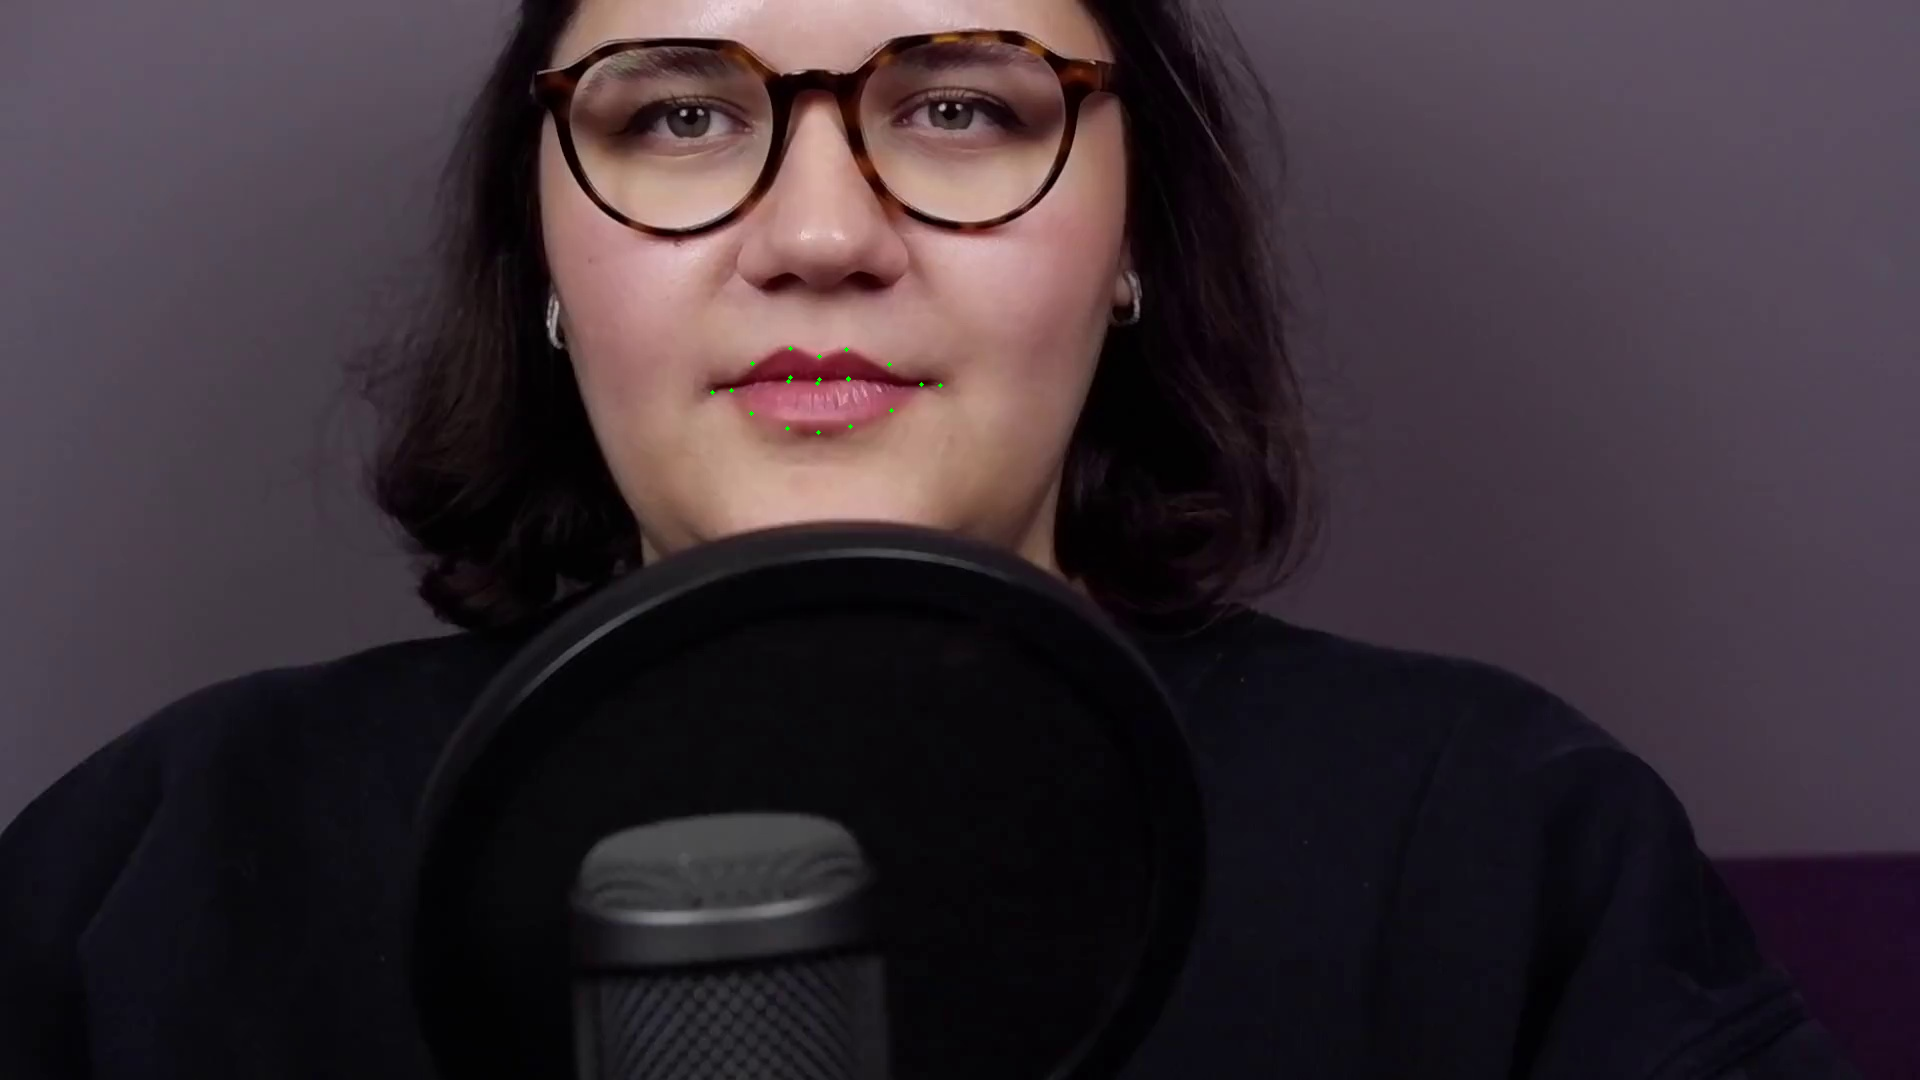

In [ ]:
from google.colab.patches import cv2_imshow  # Import this for image display in Colab

# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)  # Ensure this is the correct path

def detect_lips_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Create a list to store the lip landmarks
        lip_points = []
        for n in range(48,68):  # You are now extracting all 68 points
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lip_points.append((x, y))
            # Draw a circle at each landmark point
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Green dots on the landmark points

        return lip_points, image  # Return both landmarks and image with landmarks drawn

# Example usage
image = cv2.imread(image_path)  # Load your image
#image = cv2.imread('frames_output/frame_0.jpg')  # Load your image

lip_landmarks, image_with_landmarks = detect_lips_landmarks(image)

# Display the image with landmarks in Colab
cv2_imshow(image_with_landmarks)


In [ ]:
print(len(face_landmarks), face_landmarks)
# There are 68 landmark on the face in total. 20 of them are on the mouth and 12 of the 20 are on the outer lips.

68 [(537, 160), (542, 236), (559, 311), (581, 379), (603, 446), (636, 506), (694, 544), (760, 565), (831, 567), (903, 559), (975, 537), (1038, 497), (1075, 438), (1100, 369), (1119, 293), (1130, 214), (1132, 135), (564, 88), (600, 42), (656, 32), (712, 39), (764, 60), (866, 60), (919, 37), (975, 28), (1032, 37), (1073, 77), (816, 98), (818, 145), (818, 190), (820, 238), (762, 288), (791, 292), (822, 298), (851, 293), (880, 289), (632, 126), (663, 105), (703, 104), (740, 126), (703, 129), (663, 133), (901, 123), (938, 99), (976, 101), (1008, 121), (976, 127), (939, 126), (712, 392), (752, 363), (790, 348), (819, 356), (846, 349), (889, 364), (940, 385), (891, 410), (850, 426), (818, 432), (787, 428), (751, 413), (731, 390), (790, 377), (819, 379), (848, 378), (921, 384), (848, 379), (817, 383), (788, 381)]


In [ ]:
def process_frames(video_to_frames_folder, lip_landmark_images_folder, start_frame, end_frame):
    """
    Process a range of frames in a folder and save the processed frames with landmarks.

    Parameters:
        video_to_frames_folder (str): Path to the folder containing input frames.
        lip_landmark_images_folder (str): Path to save the processed frames.
        start_frame (int): The starting frame number to process.
        end_frame (int): The ending frame number to process.
    """
    if not os.path.exists(lip_landmark_images_folder):
        os.makedirs(lip_landmark_images_folder)

    # Iterate over all images in the input folder
    for file_name in sorted(os.listdir(video_to_frames_folder)):
        # Extract the frame number from the file name (assuming the format "frame_<number>.jpg")
        try:
            frame_number = int(file_name.split('_')[1].split('.')[0])
        except (IndexError, ValueError):
            print(f"Skipping file with unexpected format: {file_name}")
            continue

        # Process only frames within the specified range
        if start_frame <= frame_number <= end_frame:
            file_path = os.path.join(video_to_frames_folder, file_name)

            # Read the image
            image = cv2.imread(file_path)
            if image is None:
                print(f"Failed to read {file_name}. Skipping.")
                continue

            # Detect lip landmarks and draw them on the image
            lip_landmarks, image_with_landmarks = detect_lips_landmarks(image)

            # Save the processed image to the output folder
            output_path = os.path.join(lip_landmark_images_folder, file_name)
            cv2.imwrite(output_path, image_with_landmarks)

            # Optionally display the image in Colab (uncomment if needed)
            # cv2_imshow(image_with_landmarks)

            print(f"Processed and saved: {output_path}")

# Example usage
video_to_frames_folder = 'frames_output3'  # Folder containing your input frames
lip_landmark_images_folder = 'lip_landmark_frames_output_Nagis2'  # Folder to save processed frames

# Define the range of frames to process
start_frame = 1620  # Start processing from frame_2.jpg
end_frame = 1720   # End processing at frame_10.jpg

process_frames(video_to_frames_folder, lip_landmark_images_folder, start_frame, end_frame)

Processed and saved: lip_landmark_frames_output_Nagis2/frame_1620.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1621.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1622.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1623.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1624.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1625.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1626.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1627.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1628.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1629.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1630.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1631.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1632.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1633.jpg
Processed and saved:

In [ ]:
def show_processed_frames(output_folder, start_frame, end_frame):
    """
    Display the processed frames for a specified range in integer order with a vertical layout.

    Parameters:
        output_folder (str): Path to the folder containing processed frames.
        start_frame (int): The starting frame number to display.
        end_frame (int): The ending frame number to display.
    """
    processed_frames = []

    # Collect the processed frames in the specified range
    for file_name in os.listdir(output_folder):
        try:
            frame_number = int(file_name.split('_')[1].split('.')[0])
        except (IndexError, ValueError):
            print(f"Skipping file with unexpected format: {file_name}")
            continue

        if start_frame <= frame_number <= end_frame:
            file_path = os.path.join(output_folder, file_name)
            image = cv2.imread(file_path)
            if image is not None:
                processed_frames.append((frame_number, image))

    # Sort frames by their frame number
    processed_frames.sort(key=lambda x: x[0])

    # Display the collected frames vertically
    if processed_frames:
        plt.figure(figsize=(10, len(processed_frames) * 5))  # Adjust figure height based on number of frames
        for i, (frame_number, frame) in enumerate(processed_frames, start=1):
            plt.subplot(len(processed_frames), 1, i)  # Vertical layout
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Frame {frame_number}", fontsize=14)  # Larger font for titles
            plt.axis('off')
        plt.tight_layout(pad=3)  # Adjust spacing between images
        plt.show()
    else:
        print(f"No frames found in the specified range {start_frame}-{end_frame}.")

# Example usage
lip_landmark_images_folder = 'lip_landmark_frames_output_Nagis2'  # Folder containing processed frames

# Define the range of frames to display
start_frame = 1620  # Start displaying from frame_2.jpg
end_frame = 1720   # End displaying at frame_10.jpg, as there aren't frame_11 and frame_12 in the folder.

show_processed_frames(lip_landmark_images_folder, start_frame, end_frame)


In [ ]:
"""
BEWARE: For this function to work, you need to have the corresponding lip landmarked frames in the lip_landmark_frames_output folder.

For that, you need to use the "process_frames" function properly. Choose the frame inputs properly when you use that function!
"""

def show_processed_frames_by_time(output_folder, start_time_ms, end_time_ms, fps):
    """
    Display the processed frames for a specified time range (in milliseconds).

    Parameters:
        output_folder (str): Path to the folder containing processed frames.
        start_time_ms (int): Start time in milliseconds.
        end_time_ms (int): End time in milliseconds.
        fps (int): Frames per second of the video.
    """
    # Calculate frame numbers from time range
    start_frame = int((start_time_ms / 1000) * fps)
    end_frame = int((end_time_ms / 1000) * fps)

    print(f"Processing frames from {start_frame} to {end_frame} (calculated from {start_time_ms}-{end_time_ms} ms).")

    processed_frames = []

    # Collect the processed frames in the specified range
    for file_name in os.listdir(output_folder):
        try:
            frame_number = int(file_name.split('_')[1].split('.')[0])
        except (IndexError, ValueError):
            print(f"Skipping file with unexpected format: {file_name}")
            continue

        if start_frame <= frame_number <= end_frame:
            file_path = os.path.join(output_folder, file_name)
            image = cv2.imread(file_path)
            if image is not None:
                processed_frames.append((frame_number, image))

    # Sort frames by their frame number
    processed_frames.sort(key=lambda x: x[0])

    # Display the collected frames vertically
    if processed_frames:
        plt.figure(figsize=(10, len(processed_frames) * 5))  # Adjust figure height based on number of frames
        for i, (frame_number, frame) in enumerate(processed_frames, start=1):
            plt.subplot(len(processed_frames), 1, i)  # Vertical layout
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Frame {frame_number} ({frame_number / fps:.2f} s)", fontsize=14)  # Add time info
            plt.axis('off')
        plt.tight_layout(pad=3)  # Adjust spacing between images
        plt.show()
    else:
        print(f"No frames found in the specified time range {start_time_ms}-{end_time_ms} ms.")

# Example usage
lip_landmark_images_folder = 'lip_landmark_frames_output'  # Folder containing processed frames

# Define the time range in milliseconds and FPS. Comments below are arbitrary, just for my trials, can ignore 330 ms etc.
start_time_ms =   # Start displaying from 0 ms
end_time_ms = 600    # End displaying at 330 ms, as there are no frames after that in the directory.
fps = 30             # Frames per second of the video (if 120 fps, edit the fps = 120)

show_processed_frames_by_time(lip_landmark_images_folder, start_time_ms, end_time_ms, fps)


In [ ]:
import os
import zipfile
from google.colab import files  # For downloading files in Colab

def download_selected_frames(output_folder, start_frame, end_frame, zip_name="selected_frames.zip"):
    """
    Download selected frames as a zip file.

    Parameters:
        output_folder (str): Path to the folder containing processed frames.
        start_frame (int): Starting frame number.
        end_frame (int): Ending frame number.
        zip_name (str): Name of the zip file to create and download.
    """
    # Create a zip file
    with zipfile.ZipFile(zip_name, 'w') as zipf:
        for file_name in os.listdir(output_folder):
            try:
                # Extract frame number from the file name
                frame_number = int(file_name.split('_')[1].split('.')[0])
            except (IndexError, ValueError):
                print(f"Skipping file with unexpected format: {file_name}")
                continue

            # Add files within the range to the zip file
            if start_frame <= frame_number <= end_frame:
                file_path = os.path.join(output_folder, file_name)
                zipf.write(file_path, os.path.basename(file_path))  # Add file to the zip

    # Download the zip file
    files.download(zip_name)
    print(f"Downloaded {zip_name} containing frames {start_frame} to {end_frame}.")

# Example usage
lip_landmark_images_folder = 'lip_landmark_frames_output'  # Folder containing processed frames

# Define the frame range to download
start_frame = 2
end_frame = 10

download_selected_frames(lip_landmark_images_folder, start_frame, end_frame)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded selected_frames.zip containing frames 2 to 10.


In [ ]:
import os
import zipfile
from google.colab import files  # For downloading files in Colab

def download_selected_frames(output_folder, start_frame, end_frame, zip_name="selected_frames.zip"):
    """
    Download selected frames as a zip file.

    Parameters:
        output_folder (str): Path to the folder containing processed frames.
        start_frame (int): Starting frame number.
        end_frame (int): Ending frame number.
        zip_name (str): Name of the zip file to create and download.
    """
    # Create a zip file
    with zipfile.ZipFile(zip_name, 'w') as zipf:
        for file_name in os.listdir(output_folder):
            try:
                # Extract frame number from the file name
                frame_number = int(file_name.split('_')[1].split('.')[0])
            except (IndexError, ValueError):
                print(f"Skipping file with unexpected format: {file_name}")
                continue

            # Add files within the range to the zip file
            if start_frame <= frame_number <= end_frame:
                file_path = os.path.join(output_folder, file_name)
                zipf.write(file_path, os.path.basename(file_path))  # Add file to the zip

    # Download the zip file
    files.download(zip_name)
    print(f"Downloaded {zip_name} containing frames {start_frame} to {end_frame}.")

# Example usage
lip_landmark_images_folder = 'lip_landmark_frames_output'  # Folder containing processed frames

# Define the frame range to download
start_frame = 2
end_frame = 1000

download_selected_frames(lip_landmark_images_folder, start_frame, end_frame)

In [ ]:
# Calculates the aspect ratio. I think it is a nice indicator and should be in the solution formula.
# If the value is greater, the "probability" of roundedness is higher.

def lip_features(lip_landmarks):
    # Convert tuples to NumPy arrays for vector operations
    top_lip = np.mean(lip_landmarks[50:53], axis=0)  # Upper middle lip
    bottom_lip = np.mean(lip_landmarks[56:59], axis=0)  # Lower middle lip
    left_corner = np.array(lip_landmarks[48])  # Left corner of the mouth
    right_corner = np.array(lip_landmarks[54])  # Right corner of the mouth

    # Calculate vertical and horizontal distances
    vertical_dist = np.linalg.norm(top_lip - bottom_lip)
    horizontal_dist = np.linalg.norm(left_corner - right_corner)

    # Calculate lip aspect ratio
    lip_aspect_ratio = vertical_dist / horizontal_dist

    return lip_aspect_ratio

# Example usage
lip_aspect_ratio = lip_features(face_landmarks)

if lip_aspect_ratio is not None:
    print(f"Lip Aspect Ratio: {lip_aspect_ratio}")


#left corner:48,
#upper outer: [49:54],
#right corner: 54,
#lower outer: [55:60],
#inner left corner: 60,
#upper inner: [61:64],
#inner right corner: 64,
#lower inner: [65:68]

Lip Aspect Ratio: 0.23062633458077647


## Try to create a Kernel as a Filter

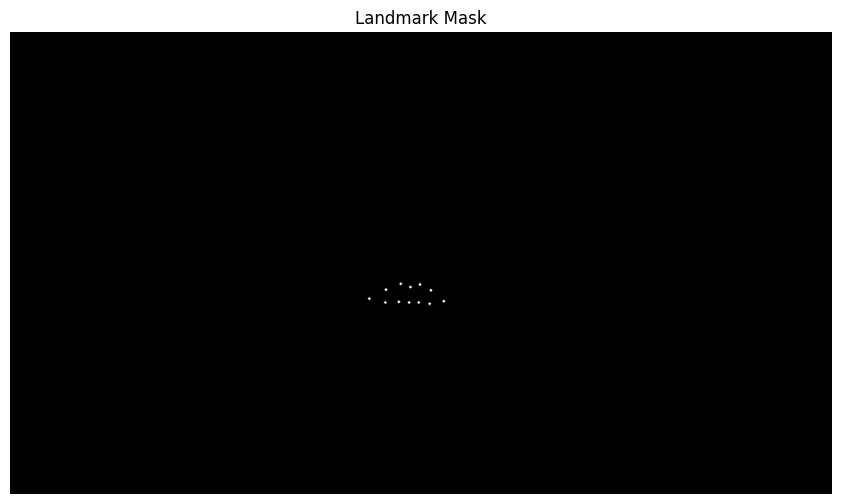

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_kernel(image, kernel):
    """
    Apply the given convolution kernel to an image.

    Parameters:
        image (numpy.ndarray): The input image to which the kernel is applied.
        kernel (numpy.ndarray): The convolution kernel.

    Returns:
        numpy.ndarray: The convolved image.
    """
    # Apply the kernel to the image using the cv2.filter2D function
    convolved = cv2.filter2D(image, -1, kernel)
    return convolved


def create_landmark_mask(image_shape, landmarks):
    # Create an empty mask
    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    # Mark the landmark points on the mask
    for (x, y) in landmarks:
        cv2.circle(mask, (x, y), radius=2, color=255, thickness=-1)

    return mask

# Example usage
landmark_mask = create_landmark_mask(image.shape, outer_lip_landmarks)

# Display the original mask and the convolved result
plt.figure(figsize=(12, 6))
plt.imshow(landmark_mask, cmap='gray')
plt.title('Landmark Mask')
plt.axis('off')
plt.show()


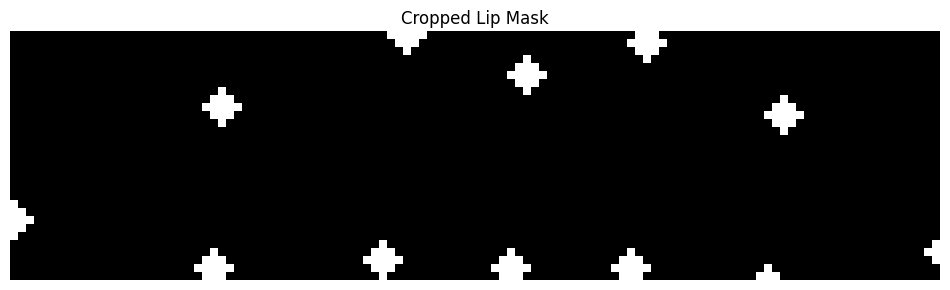

In [ ]:
def crop_lip_region(image, landmarks):
    """
    Crop the region around the lip based on the landmarks.

    Parameters:
        image (numpy.ndarray): The original image.
        landmarks (list of tuples): The list of landmark points.

    Returns:
        numpy.ndarray: The cropped lip region.
        tuple: The coordinates of the top-left corner of the cropped region (x_min, y_min).
    """
    # Get the bounding box for the lip landmarks
    x_min = min([point[0] for point in landmarks])
    y_min = min([point[1] for point in landmarks])
    x_max = max([point[0] for point in landmarks])
    y_max = max([point[1] for point in landmarks])

    # Crop the lip region from the image
    cropped_lip = image[y_min:y_max, x_min:x_max]

    return cropped_lip, (x_min, y_min)

# Crop the lip region from the landmark mask
cropped_lip_mask, (x_min, y_min) = crop_lip_region(landmark_mask, outer_lip_landmarks)


# Display the cropped lip region and the convolved result
plt.figure(figsize=(12, 6))
plt.imshow(cropped_lip_mask, cmap='gray')
plt.title('Cropped Lip Mask')
plt.axis('off')
plt.show()


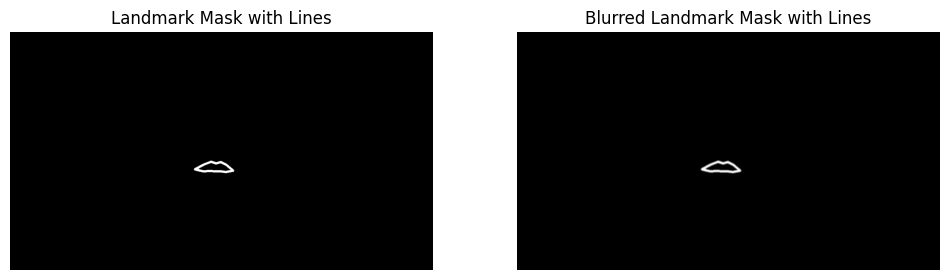

In [ ]:
def create_landmark_mask_with_lines(image_shape, landmarks, radius=5, is_closed=True):
    """
    Create a mask for the given landmarks, drawing lines between them.

    Parameters:
        image_shape (tuple): The shape of the original image.
        landmarks (list of tuples): The list of landmark points.
        radius (int): Radius of the points for visualization.
        is_closed (bool): Whether to close the contour.

    Returns:
        numpy.ndarray: The mask with lines connecting the landmark points.
    """
    # Create an empty mask
    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    # Convert landmarks to a format suitable for drawing polylines
    points = np.array(landmarks, np.int32).reshape((-1, 1, 2))

    # Draw lines connecting the landmarks
    cv2.polylines(mask, [points], isClosed=is_closed, color=255, thickness=radius)

    return mask

# Example usage
landmark_mask_with_lines = create_landmark_mask_with_lines(image.shape, outer_lip_landmarks, radius=5)

# Optionally, apply Gaussian blur to smooth the mask
blurred_mask_with_lines = cv2.GaussianBlur(landmark_mask_with_lines, (5, 5), sigmaX=2)

# Display the mask with lines and the blurred version
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(landmark_mask_with_lines, cmap='gray')
plt.title('Landmark Mask with Lines')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_mask_with_lines, cmap='gray')
plt.title('Blurred Landmark Mask with Lines')
plt.axis('off')

plt.show()


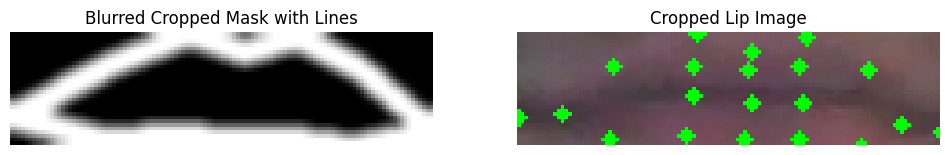

In [ ]:
def crop_and_create_landmark_mask(image, landmarks, radius=5, is_closed=True):
    """
    Crop the region around the lip based on the landmarks and create a mask with lines.

    Parameters:
        image (numpy.ndarray): The original image.
        landmarks (list of tuples): The list of landmark points.
        radius (int): Radius of the points for visualization.
        is_closed (bool): Whether to close the contour.

    Returns:
        numpy.ndarray: The cropped lip region mask with lines connecting the landmark points.
        numpy.ndarray: The cropped original image of the lip region.
    """
    # Get the bounding box for the lip landmarks
    x_min = min([point[0] for point in landmarks])
    y_min = min([point[1] for point in landmarks])
    x_max = max([point[0] for point in landmarks])
    y_max = max([point[1] for point in landmarks])

    # Crop the lip region from the original image
    cropped_image = image[y_min:y_max, x_min:x_max]

    # Create an empty mask with the shape of the cropped region
    cropped_mask = np.zeros((y_max - y_min, x_max - x_min), dtype=np.uint8)

    # Adjust landmarks to the cropped region
    adjusted_landmarks = [(x - x_min, y - y_min) for (x, y) in landmarks]

    # Convert adjusted landmarks to a format suitable for drawing polylines
    points = np.array(adjusted_landmarks, np.int32).reshape((-1, 1, 2))

    # Draw lines connecting the landmarks
    cv2.polylines(cropped_mask, [points], isClosed=is_closed, color=255, thickness=radius)

    return cropped_mask, cropped_image

# Example usage
cropped_mask_with_lines, cropped_lip_image = crop_and_create_landmark_mask(image, outer_lip_landmarks, radius=5)

# Optionally, apply Gaussian blur to smooth the mask
blurred_cropped_mask_with_lines = cv2.GaussianBlur(cropped_mask_with_lines, (5, 5), sigmaX=2)

# Display the cropped mask with lines and the original cropped image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(blurred_cropped_mask_with_lines, cmap='gray')
plt.title('Blurred Cropped Mask with Lines')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_lip_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Lip Image')
plt.axis('off')

plt.show()


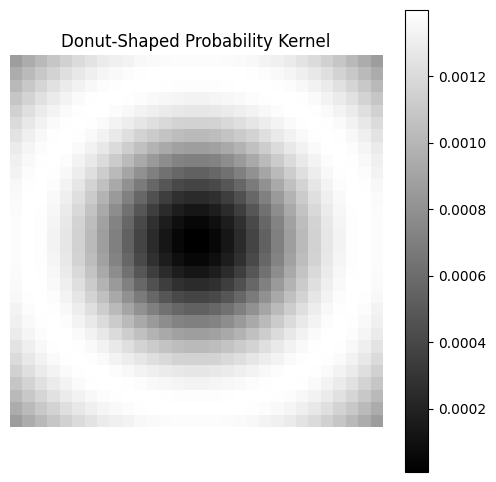

In [ ]:
# This is the main part of the solution technique. Basically a kernel to filter the mouth shape to determine if it is rounded shape.
# By playing with the parameters, the filter can be adjusted.
def create_donut_shaped_kernel(size, sigma_outer, sigma_inner):
    """
    Create a donut-shaped kernel with a Gaussian profile.

    Parameters:
        size (int): The diameter of the kernel.
        sigma_outer (float): The standard deviation of the outer Gaussian.
        sigma_inner (float): The standard deviation of the inner Gaussian.

    Returns:
        numpy.ndarray: The donut-shaped kernel.
    """
    # Create a 2D Gaussian for the outer ring
    x = np.linspace(-size // 2, size // 2, size)
    y = np.linspace(-size // 2, size // 2, size)
    x, y = np.meshgrid(x, y)
    gaussian_outer = np.exp(-(x**2 + y**2) / (2 * sigma_outer**2))

    # Create a 2D Gaussian for the inner subtraction
    gaussian_inner = np.exp(-(x**2 + y**2) / (2 * sigma_inner**2))

    # Subtract the inner Gaussian from the outer Gaussian to create a donut shape
    donut_kernel = gaussian_outer - gaussian_inner

    # Normalize the kernel to make the sum equal to 1 (probability distribution)
    donut_kernel /= np.sum(np.abs(donut_kernel))

    return donut_kernel

# Example usage
donut_kernel = create_donut_shaped_kernel(size=30, sigma_outer=10, sigma_inner=9.7)

# Display the donut-shaped kernel
plt.figure(figsize=(6, 6))
plt.imshow(donut_kernel, cmap='gray')
plt.title('Donut-Shaped Probability Kernel')
plt.colorbar()
plt.axis('off')
plt.show()


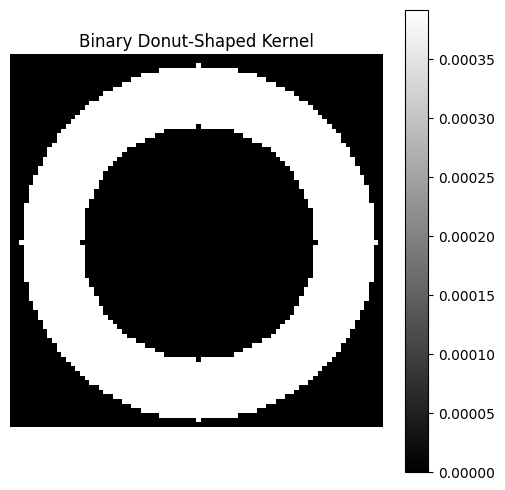

In [ ]:
def create_binary_donut_kernel(size, outer_radius, inner_radius):
    """
    Create a binary donut-shaped kernel.

    Parameters:
        size (int): The diameter of the kernel.
        outer_radius (float): The radius of the outer circle.
        inner_radius (float): The radius of the inner circle to be subtracted.

    Returns:
        numpy.ndarray: The binary donut-shaped kernel.
    """
    # Create an empty kernel
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2

    # Create the outer circular mask
    for i in range(size):
        for j in range(size):
            if (i - center)**2 + (j - center)**2 <= outer_radius**2:
                kernel[i, j] = 1

    # Subtract the inner circular mask
    for i in range(size):
        for j in range(size):
            if (i - center)**2 + (j - center)**2 <= inner_radius**2:
                kernel[i, j] = 0

    # Normalize the kernel
    kernel /= np.sum(kernel)

    return kernel

# Example usage for a binary donut
binary_donut_kernel = create_binary_donut_kernel(size=80, outer_radius=38, inner_radius=25)

# Display the binary donut-shaped kernel
plt.figure(figsize=(6, 6))
plt.imshow(binary_donut_kernel, cmap='gray')
plt.title('Binary Donut-Shaped Kernel')
plt.colorbar()
plt.axis('off')
plt.show()


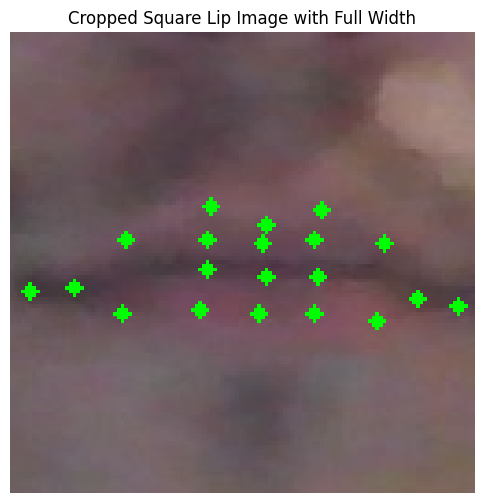

In [ ]:
def crop_lip_to_square_with_full_width(image, landmarks, padding=0):
    """
    Crop the region around the lip based on the landmarks, keeping the full width,
    and adjusting the height to make the crop square.

    Parameters:
        image (numpy.ndarray): The original image.
        landmarks (list of tuples): The list of landmark points.
        padding (int): Additional padding to add around the cropped region.

    Returns:
        numpy.ndarray: The cropped square lip region.
    """
    # Get the bounding box for the lip landmarks
    x_min = min([point[0] for point in landmarks]) - padding
    y_min = min([point[1] for point in landmarks]) - padding
    x_max = max([point[0] for point in landmarks]) + padding
    y_max = max([point[1] for point in landmarks]) + padding

    # Ensure the coordinates are within image boundaries
    x_min = max(x_min, 0)
    y_min = max(y_min, 0)
    x_max = min(x_max, image.shape[1])
    y_max = min(y_max, image.shape[0])

    # Calculate the width and height of the cropped region
    width = x_max - x_min
    height = y_max - y_min

    # Make the cropped region square by expanding the height
    if width > height:
        # Calculate the additional height needed to make it square
        diff = (width - height) // 2
        y_min = max(y_min - diff, 0)
        y_max = min(y_max + diff, image.shape[0])

    # Crop the square region from the original image
    cropped_square = image[y_min:y_max, x_min:x_max]

    return cropped_square

# Example usage
cropped_square_lip_with_full_width = crop_lip_to_square_with_full_width(image, outer_lip_landmarks, padding=5)

# Display the cropped square lip with full width
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(cropped_square_lip_with_full_width, cv2.COLOR_BGR2RGB))
plt.title('Cropped Square Lip Image with Full Width')
plt.axis('off')
plt.show()


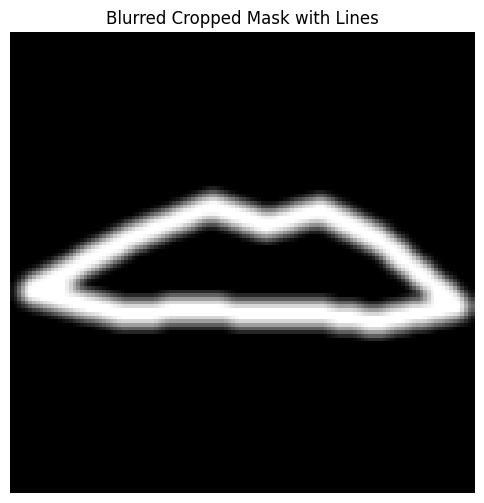

In [ ]:
def create_landmark_mask_with_lines(image_shape, landmarks, radius=5, is_closed=True):
    """
    Create a mask for the given landmarks, drawing lines between them.

    Parameters:
        image_shape (tuple): The shape of the original image.
        landmarks (list of tuples): The list of landmark points.
        radius (int): Radius of the points for visualization.
        is_closed (bool): Whether to close the contour.

    Returns:
        numpy.ndarray: The mask with lines connecting the landmark points.
    """
    # Create an empty mask
    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    # Convert landmarks to a format suitable for drawing polylines
    points = np.array(landmarks, np.int32).reshape((-1, 1, 2))

    # Draw lines connecting the landmarks
    cv2.polylines(mask, [points], isClosed=is_closed, color=255, thickness=radius)

    return mask

def crop_mask_to_square_with_full_width(mask, landmarks, padding=0):
    """
    Crop the mask to a square region with the full width, adjusted to include the mouth.

    Parameters:
        mask (numpy.ndarray): The mask with lines.
        landmarks (list of tuples): The list of landmark points.
        padding (int): Additional padding to add around the cropped region.

    Returns:
        numpy.ndarray: The cropped square mask.
    """
    # Use the same cropping logic as the function to crop the image
    return crop_lip_to_square_with_full_width(mask, landmarks, padding)

# Create the initial landmark mask with lines
landmark_mask_with_lines = create_landmark_mask_with_lines(image.shape, outer_lip_landmarks, radius=5)

# Crop the mask to a square region
cropped_mask_with_lines = crop_mask_to_square_with_full_width(landmark_mask_with_lines, outer_lip_landmarks, padding=5)

# Apply Gaussian blur to the cropped mask
blurred_cropped_mask_with_lines = cv2.GaussianBlur(cropped_mask_with_lines, (5, 5), sigmaX=2)

# Display the blurred mask
plt.figure(figsize=(6, 6))
plt.imshow(blurred_cropped_mask_with_lines, cmap='gray')
plt.title('Blurred Cropped Mask with Lines')
plt.axis('off')
plt.show()


In [ ]:
def resize_kernel_to_match(masked_image, filter_kernel):
    """
    Resize the filter kernel to match the dimensions of the masked image.

    Parameters:
        masked_image (numpy.ndarray): The masked lip image.
        filter_kernel (numpy.ndarray): The filter kernel to be resized.

    Returns:
        numpy.ndarray: The resized filter kernel.
    """
    # Resize the filter kernel to match the shape of the masked image
    resized_kernel = cv2.resize(filter_kernel, (masked_image.shape[1], masked_image.shape[0]), interpolation=cv2.INTER_AREA)
    return resized_kernel

def calculate_dot_product_probability(masked_image, filter_kernel):
    """
    Calculate the dot product probability between the masked image and the filter.

    Parameters:
        masked_image (numpy.ndarray): The normalized masked lip image.
        filter_kernel (numpy.ndarray): The normalized filter kernel.

    Returns:
        float: The dot product similarity as a probability.
    """
    # Resize the kernel to match the shape of the masked image
    resized_kernel = resize_kernel_to_match(masked_image, filter_kernel)

    # Normalize the masked image and the filter
    masked_image_norm = masked_image / np.max(masked_image)
    resized_kernel_norm = resized_kernel / np.max(resized_kernel)

    # Flatten both arrays
    masked_image_flat = masked_image_norm.flatten()
    resized_kernel_flat = resized_kernel_norm.flatten()

    # Calculate the dot product
    dot_product = np.dot(masked_image_flat, resized_kernel_flat)

    # Normalize the result to get a probability (values between 0 and 1)
    probability = dot_product / (np.linalg.norm(masked_image_flat) * np.linalg.norm(resized_kernel_flat))

    return probability

# Example usage
probability_of_round_lip = calculate_dot_product_probability(blurred_cropped_mask_with_lines, donut_kernel)

print(f"Probability of a round lip shape: {probability_of_round_lip:.2f}")


# here, instead of binary_donut_kernel, donut_kernel can be used, but, it is not yet perfected and maybe it will not be perfect ever.
# I think solution should include aspect ratio value. There is a function calculating above.

Probability of a round lip shape: 0.27


In [ ]:
# After this scoring part, we should normalize the values as the values are not between 0 and 1, but rather are between 0.20,0.80.
# We need to map the values into 0 and 1.
# It will not be a "probability" per se. It will be the score of the technique.